In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data.csv')

commute_before = df['commute_before']
commute_after = df['commute_after']

# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")
print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")

도입 전 평균 통근 시간: 37.06분
도입 후 평균 통근 시간: 33.39분


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성: 동일한 시민들의 교통 시스템 도입 전후 통근 시간 (단위: 분)
np.random.seed(42)

commute_before = np.random.normal(loc=np.mean(commute_before), scale=np.std(commute_before), size=np.size(commute_before))  
# 도입 전 평균, 표준편차, 표본 크기를 입력

commute_after = np.random.normal(loc=np.mean(commute_after), scale=np.std(commute_after), size=np.size(commute_after))  
# 도입 후 평균, 표준편차, 표본 크기를 입력

# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")  
# 평균 계산

print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")  
# 평균 계산


도입 전 평균 통근 시간: 36.23분
도입 후 평균 통근 시간: 32.84분


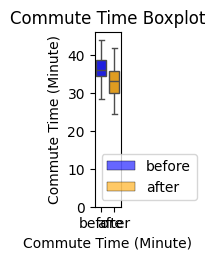

In [4]:
plt.figure(figsize=(12, 5))
# 그래프 크기 설정 (가로, 세로)

# KDE 그래프: 통근 시간 분포 비교
plt.subplot(2, 30, 1)  
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

sns.histplot(commute_before, kde=True, color='blue', label='before', alpha=0.6)  
# KDE 포함 여부 설정

sns.histplot(commute_after, kde=True, color='orange', label='after', alpha=0.6)  

plt.axvline(np.mean(commute_before), color='blue', linestyle='dashed')  
# 도입 전 평균선 추가

plt.axvline(np.mean(commute_after), color='orange', linestyle='dashed')  
# 도입 후 평균선 추가

plt.title('Commute time of Distribution')  
plt.xlabel('Commute Time (Minute)')  
plt.legend()

# 박스플롯: 그룹 간 비교
plt.subplot(2, 30, 1)  

sns.boxplot(data=[commute_before, commute_after], palette=['blue', 'orange'])  
# 데이터 리스트를 입력하여 박스플롯 생성

plt.xticks([0, 1], ['before', 'after'])  
plt.title('Commute Time Boxplot')  
plt.ylabel('Commute Time (Minute)')

plt.show()


In [5]:
shapiro_before = stats.shapiro(commute_before)  
# 정규성 검정 함수

shapiro_after = stats.shapiro(commute_after)  

print(f"Shapiro-Wilk 검정 (도입 전) p-value: {shapiro_before.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (도입 후) p-value: {shapiro_after.pvalue:.4f}")  

Shapiro-Wilk 검정 (도입 전) p-value: 0.6868
Shapiro-Wilk 검정 (도입 후) p-value: 0.9130


In [6]:
# 대응표본 t-검정 수행
paired_t_stat, p_value = stats.ttest_rel(commute_before, commute_after)  
# 대응표본 t-검정 함수 사용

print(f"대응표본 t-검정 t-통계량: {paired_t_stat:.4f}")  
print(f"p-value: {p_value:.4f}")  

대응표본 t-검정 t-통계량: 3.3503
p-value: 0.0023
